**What is Data Analysis?**

The process of analyzing, cleaning, transforming and modeling data to find useful information, draw conclusions, and support decision-making is called Data Analysis.

There are various techniques and approaches for data analysis.
Data analysis in statistics is generally divided into descriptive statistics, EDA (Exploratory Data Analysis) and  CDA (Confirmatory Data Analysis). Data removal is the process of correcting outliers and other incorrect and unwanted information.

Depending on the type of data to be cleaned, there are several data cleanup operations to use.

Data analysis is a key component of data mining and Business Intelligence (BI) and plays a key role in gaining insight into business decisions. Organizations analyze data from multiple sources using large data management solutions and customer experience management solutions that use data analysis to convert data into process analysis.

**Data Analysis Model**

**Decision-making objectives**:The goals, metrics, or performance indicators of data science teams should be identified early to develop a measurable way to determine whether the business is moving towards its goals.

**Data collecting**:As much data as possible should be collected from various sources in order to create better models and obtain further actionable information.

**Data cleaning**: Data quality should be improved and the process should be automated in order to produce the right results and not to produce wrong results, but employees need to check the data cleanliness and ensure accuracy.

**Raising a data science team**: When establishing a science team, infrastructure engineers, software developers, ETL experts and experts with advanced statistical knowledge should be involved. The established team should then be provided with large-scale data analysis platforms that are needed to automate data collection and analysis.

**Optimization and Repetition**: Excellence can be achieved by repeating processes to create accurate predictions, achieve goals, and monitor and report consistently.

[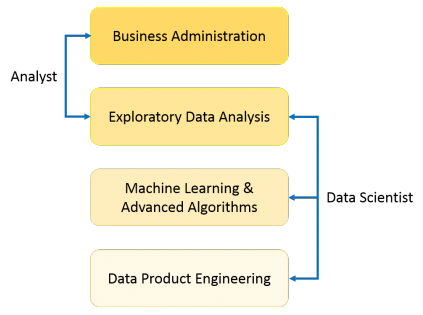](http://)

In this analysis, I developed a model aimed at predicting flight delays at the Destination Airport. The purpose is to create a Data set which can be used for visualization and model Building so as to predict the Delays of Flights. I did the visualization so as to get better inferences about the data. For, model fitting I have seperated the Dataset into training Data and Testing Data so that prediction can be done on the testing Data. I also showed how to import Tableau and make visualization more crisp and clear.

**Technical aspect Covered**:

**visualization**: matplolib, seaborn

**data manipulation**: pandas, numpy

**modeling**: sklearn


For EDA I used some part of Python coding and Tableau Visulization so as to get a brief insight and inference from the data. Various Plots are created so as to get a great idea of whats happening in the Dataset and what is the most important variable affecting the dalays of the airlines. Feature scaling is a method used to normalize the range of independent variables or features of data and this concept is used.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, warnings, scipy 

import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots

**Reading the Data Sets**

In [ ]:
flights = pd.read_csv("../input/flight-delays/flights.csv")

In [ ]:
airports = pd.read_csv("../input/flight-delays/airports.csv")
airlines = pd.read_csv("../input/flight-delays/airlines.csv")

**Type of Data**

In [ ]:
flights.info()

In [ ]:
airports.info()

In [ ]:
airlines.info()

In [ ]:
flights.describe()

In [ ]:
flights.head()


In [ ]:
flights.tail()

In [ ]:
airlines.head()

In [ ]:
airlines.tail()

In [ ]:
airports.head(10)

In [ ]:
airports.tail(15)

**Data Cleaning**
From the above table it is clear that data is not properly organised and date is given seperated and many columns have unnecessary data not useful for visualization for which it is required that we clean the data and take only those columns which is of our use.

In [ ]:
airports.isnull().sum()

In [ ]:
airports = airports.dropna(subset = ["LATITUDE","LONGITUDE"])

In [ ]:
airports.isnull().sum()

In [ ]:
flights_null = flights.isnull().sum()*100/flights.shape[0]
flights_null

In [ ]:
flights1 = flights.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [ ]:
flights1.isnull().sum()

In [ ]:
# Creting Dataset w.r.t different Types of Delays
flights11 = flights1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flights11 = flights11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)
flights11.info()

In [ ]:
# The other Dataset
Flight_Delays = flights11

In [ ]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
flights2 = flights1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)
flights2.isnull().sum()

In [ ]:
flights2.info()

In [ ]:
#we need to change the data type to datetime format
flights2.DEPARTURE_TIME.head(10)

In [ ]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [ ]:
flights2['Actual_Departure'] =flights1['DEPARTURE_TIME'].apply(Format_Hourmin)
flights2['Actual_Departure'].head(10)

In [ ]:
flights2.columns

In [ ]:
flights2['DATE'] = pd.to_datetime(flights2[['YEAR','MONTH','DAY']])
flights2.DATE.head(10)

In [ ]:
flights2['DAY'] = flights2['DATE'].dt.weekday_name

In [ ]:
# Applying the function to required variables in the dataset
flights2['Actual_Departure'] =flights2['DEPARTURE_TIME'].apply(Format_Hourmin)
flights2['Scheduled_Arrival'] =flights2['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
flights2['Scheduled_Departure'] =flights2['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
flights2['Actual_Arrival'] =flights2['ARRIVAL_TIME'].apply(Format_Hourmin)

**Merging of 3 Data Sets**

Since there are three dataset it is required to merge all the three data set so that we can use it during the visualization in a proper way.

In [ ]:
# Merging on AIRLINE and IATA_CODE
flights2 = flights2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [ ]:
flights2 = flights2.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flights2 = flights2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [ ]:
flights2 = flights2.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flights2 = flights2.merge(airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [ ]:
flights2.columns

In [ ]:
flights2 = flights2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)
flights2 = flights2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})


In [ ]:
flights2

**Data Visualization**

In [ ]:
#airports with the most flights

F=flights2.Org_Airport_Name.value_counts().sort_values(ascending=False)[:20]
print(F)

In [ ]:
F=flights2.Org_Airport_Name.value_counts().sort_values(ascending=False)[:15]
label=F.index
size=F.values
colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua','yellow','#D4E157','#D1C4E9','#1A237E','#64B5F6','#009688',
          '#1DE9B6','#66BB6A','#689F38','#FFB300']
trace =go.Pie(labels=label, values=size, marker=dict(colors=colors), hole=.1)
data = [trace]
layout = go.Layout(title='Origin Airport Distribution')
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
#cities with the most flights
F=flights2.Origin_city.value_counts().sort_values(ascending=False)[:15]
print(F)

In [ ]:
#Cities from most flights
F=flights2.Destination_city.value_counts().sort_values(ascending=False)[:15]
print(F)

In [ ]:
F=flights2.Origin_city.value_counts().sort_values(ascending=False)[:15]

trace1 = go.Bar(x=F.index,y=F.values,marker=dict(color = '#009688'))
                                                      
F = flights2.Destination_city.value_counts().sort_values(ascending=False)[:15]

trace2 = go.Bar(x=F.index, y=F.values, marker=dict( color ='#689F38' ))
 
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Origin City','Destination City'))                                                        
 
fig.add_trace(trace1, 1,1) 
fig.add_trace(trace2, 1,2)  
fig['layout'].update(yaxis = dict(title = 'Values'), height=500, width=900, showlegend=False)
py.iplot(fig)                                                          

In [ ]:
F=flights2.AIRLINE.value_counts().sort_values(ascending=False)[:7]
print(F)

In [ ]:
F=flights2.AIRLINE.value_counts().sort_values(ascending=True)[:7]
print(F)

In [ ]:
#airlines flight rankings
F=flights2.AIRLINE.value_counts().sort_values(ascending=False)[:8]
trace1 = go.Scatter(x=F.index, y=F.values,name='Most Flights',marker=dict(color='blue'))

F=flights2.AIRLINE.value_counts().sort_values(ascending=True)[:7].iloc[::-1]
trace2 = go.Scatter(x=F.index, y=F.values,name='Least Flights',marker=dict(color='yellow'))

data=[trace1,trace2]
layout = dict(title = 'Airline distribution')
fig = dict(data=data,layout = layout)
py.iplot(fig)



In [ ]:
F=flights2.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
F.columns=['Month','Flight_Values']
print(F)

In [ ]:
#number of flights per month
F=flights2.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
F.columns=['Month','Flight_Values']
Month={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6: 'Jun',
       7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
F.Month=F.Month.map(Month)
colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1','lightblue','lightgreen',
          'aqua','yellow','#D4E157','#D1C4E9','#1A237E','#64B5F6']
trace=go.Bar(x=F.Month,y=F.Flight_Values,marker=dict(color=colors))
data=[trace]
layout = go.Layout(title='Monthly Flights',yaxis=dict(title='Flights Value'),height=500, width=800)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)   



In [ ]:
#number of flights per week
Flight_Valume=flights2.pivot_table(index='Origin_city',columns='DAY_OF_WEEK',values='DAY',aggfunc=lambda x:x.count())
F=Flight_Valume.sort_values(by=1,ascending=False)[:7]
print(F)


In [ ]:
Flight_Valume=flights2.pivot_table(index='Origin_city',columns='DAY_OF_WEEK',values='DAY',aggfunc=lambda x:x.count())
F=Flight_Valume.sort_values(by=1,ascending=False)[:7]
F=F.iloc[::-1]
fig = plt.figure(figsize=(16,9))
sns.heatmap(F, cmap='RdBu', linecolor='black', linewidths=1)
plt.title('Air Traffic by Cities',size=16)
plt.ylabel('City',size=16)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#number of departure delays
F=flights2.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',ascending=False).round(3)
print(F)


In [ ]:
#number of arrival delays
F=flights2.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',ascending=False).round(3)
print(F)

In [ ]:
F=flights2.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',ascending=False).round(3)
trace1=go.Bar(x=F.index, y=F.DEPARTURE_DELAY ,name='DEPARTURE_DELAY', marker=dict(color='navy'))
F=flights2.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',ascending=False).round(3)
trace2=go.Bar(x=F.index, y=F.ARRIVAL_DELAY, name='ARRIVAL_DELAY', marker=dict(color='red'))
data=[trace1, trace2]
layout= go.Layout(xaxis=dict(tickangle=90),title='Mean Arrival & Departure Delay by Airlines', yaxis=dict(title='Minute'), barmode='stack')
fig=go.Figure(data=data, layout=layout)
py.iplot(fig)


In [ ]:
flights2['Delay_Difference'] = flights2['DEPARTURE_DELAY'] - flights2['ARRIVAL_DELAY']
F=flights2.groupby('AIRLINE').Delay_Difference.mean().to_frame().sort_values(by='Delay_Difference', ascending=False).round(3)
print(F)

In [ ]:
flights2['Delay_Difference'] = flights2['DEPARTURE_DELAY'] - flights2['ARRIVAL_DELAY']
F=flights2.groupby('AIRLINE').Delay_Difference.mean().to_frame().sort_values(by='Delay_Difference', ascending=False).round(3)
trace=go.Bar(x=F.index, y=F.Delay_Difference, marker=dict(color = F.Delay_Difference, colorscale='Cividis',showscale=True))
data=[trace]
layout = go.Layout(xaxis=dict(tickangle=45),title='Mean (Departure Delay - Arrival Delay) by Airlines', yaxis = dict(title = 'Minute'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)                                

In [ ]:
flights2['Taxi_Difference'] = flights2['TAXI_OUT'] - flights2['TAXI_IN']
F = flights2.groupby('AIRLINE').Taxi_Difference.mean().to_frame().sort_values(by='Taxi_Difference',ascending=False).round(2)
print(F)

In [ ]:
flights2['Taxi_Difference'] = flights2['TAXI_OUT'] - flights2['TAXI_IN']
F = flights2.groupby('AIRLINE').Taxi_Difference.mean().to_frame().sort_values(by='Taxi_Difference',ascending=False).round(2)

trace = go.Bar(x=F.index, y=F.Taxi_Difference, marker=dict(color = F.Taxi_Difference,colorscale='viridis',showscale=True))

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=45),title='Mean (Taxi Out - Taxi In) by Airlines', yaxis = dict(title = 'Minute'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)